In [216]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
units = pd.read_excel('data/USUP-libellés.xls')

In [168]:
df = pd.read_csv('data/sample-data.csv')
df.columns = ['YEAR', 'MONTH', 'FLUX', 'ID', 'DEPT', 'NC8', 'CPA6', 'PYOD', 'PAYP', 'VAT', 'PRIFAC', 'DEVFAC',
              'VFTE', 'VART', 'D_MASSE', 'MASSE', 'USUP', 'USUP_MT']
              
df['NC8'] = df['NC8'].astype(str)

Index([u'v1', u'v2', u'v3', u'v4', u'v5', u'v6', u'v7', u'v8', u'v9', u'v10',
       u'v11', u'v12', u'v13', u'v14', u'v15', u'v16', u'v17', u'v18'],
      dtype='object')

In [169]:

# Column 3.  FLUX: flow type [1 = Import ouside UE;  2 = Export outside UE; 3 = Import within UE, 4=export within UE]/# Column 4.  ID code domestic firm
# Column 5.  DEPT: geo location of the flow (department of transaction)
# Column 6.  NC8: product code; https://ec.europa.eu/taxation_customs/business/calculation-customs-duties/what-is-common-customs-tariff/combined-nomenclature_en
# Column 7.  CPA6: CPA6 rev 2 - 2008 identifier
# Column 8.  PYOD: partner country code (origin or destination)
# Column 9.  PAYP: country code (initial origin for imports "provenance")
# Column 10. VAT: anonymized VAT number (for flows within EU, "ventes fermes"=regime 21)
# Column 11. PRIFAC: value in local currency (for years >2010, else in euros)
# Column 12. DEVFAC: local currency (for years >2010, else EUR)
# Column 13. VFTE: value in euros --  value on the bill
# Column 14. VART: statistical value (in euros) -- value at the border
# Column 15. D_MASSE: Indicator non zero mass (bad between 2006-2010)
# Column 16. MASSE: mass in kg
# Column 17. USUP: additional units >> classification: document USUP-libellés
# Column 18. USUP_MT: amount in additional unit (nb of m3, liters...)
              
#     flow type [1 = Import ouside UE;  2 = Export outside UE; 3 = Import within UE, 4=export within UE]


In [156]:
dg = pd.read_csv('data/CN_2015.csv')
dg['Code'] = dg['Code'].astype(str).str[:8].str.zfill(8)
dg['Parent'] = dg['Parent'].astype(str).str[:8].str.zfill(8)
# l = 0
# l2 = 0
# k = [2, 2, 2, 4, 6, 7, 8, 8, 8, 8, 8, 8]
# for i in range(12):
#     print i
#     l += len(dg.loc[dg.Level == i])
#     print l
#     l2 += len(dg.loc[dg.Level == i].astype(str).Code.str[:k[i]].unique())
#     print l2
#     print ''
#     dg.loc[dg.Level == i]
    
    
CN_full = dg[['Level','Code', 'Parent', 'Description']]
CN_full['CN ID 2'] = CN_full['Code'].str[:2]
CN_full['CN ID 4'] = CN_full['Code'].str[:4]
CN_full['CN ID 5'] = CN_full['Code'].str[:5]
CN_full['CN ID 6'] = CN_full['Code'].str[:7]

0
0
0

1
21
21

2
118
109

3
1375
1324

4
4804
4620

5
9481
9240

6
12341
12100

7
13586
13345

8
14158
13917

9
14362
14121

10
14479
14238

11
14550
14309



In [251]:
dg = pd.read_csv('data/CPA_2008.csv')
dg['Code'] = dg['Code'].str.replace('.', '')
CPA_full = dg.loc[dg.Level == 6][['Code', 'Description']].rename({'Code': 'CPA ID 6', 'Description':'CPA label 6'}, axis = 1)
CPA_full['CPA ID 4'] = CPA_full['CPA ID 6'].str[:4]
CPA_full['CPA ID 3'] = CPA_full['CPA ID 6'].str[:3]
CPA_full['CPA ID 2'] = CPA_full['CPA ID 6'].str[:2]

CPA_4 = dg.loc[dg.Level == 4][['Code', 'Description']].rename({'Code': 'CPA ID 4', 'Description':'CPA label 4'}, axis = 1)
CPA_3 = dg.loc[dg.Level == 3][['Code', 'Description']].rename({'Code': 'CPA ID 3', 'Description':'CPA label 3'}, axis = 1)
CPA_2 = dg.loc[dg.Level == 2][['Code', 'Description', 'Parent']].rename({'Code': 'CPA ID 2', 'Description':'CPA label 2', 'Parent' : 'CPA ID 1'}, axis = 1)

CPA_full = CPA_full.merge(CPA_4).merge(CPA_3).merge(CPA_2)


In [303]:
dg_ = df_.merge(CPA_full[['CPA ID 6', 'CPA label 3']], left_on = 'CPA6', right_on = 'CPA ID 6')
dg_ = dg_.loc[dg_['VFTE'] > 0]

# dg_ = dg_.groupby(['Description', 'CPA label 3']).sum()[['VFTE']].sort_values(by = 'VFTE', ascending = False)

# dg_

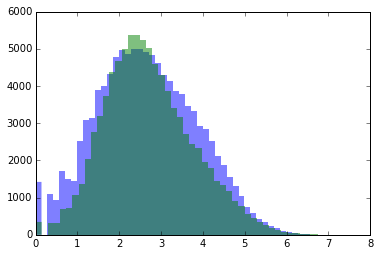

In [292]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import log10

# Column 3.  FLUX: flow type [1 = Import ouside UE;  2 = Export outside UE; 3 = Import within UE, 4=export within UE]/# Column 4.  ID code domestic firm

# plt.hist(log10(dg_.loc[dg_.FLUX == 1]['VFTE'].values), 50, alpha = .5, edgecolor = 'None')
# plt.hist(log10(dg_.loc[dg_.FLUX == 2]['VFTE'].values), 50, alpha = .5, edgecolor = 'None')
plt.hist(log10(dg_.loc[dg_.FLUX == 3]['VFTE'].values), 50, alpha = .5, edgecolor = 'None')
plt.hist(log10(dg_.loc[dg_.FLUX == 4]['VFTE'].values), 50, alpha = .5, edgecolor = 'None')
plt.show()

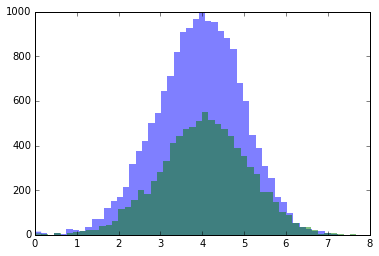

In [304]:

plt.hist(log10(dg_.loc[dg_.FLUX == 3].groupby('ID').sum()['VFTE'].values), 50, alpha = .5, edgecolor = 'None')
plt.hist(log10(dg_.loc[dg_.FLUX == 4].groupby('ID').sum()['VFTE'].values), 50, alpha = .5, edgecolor = 'None')
plt.show()

In [316]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)


In [379]:
F = 3

df = pd.DataFrame(dg_.loc[dg_.FLUX == F].groupby(['ID'])['CN ID 4'].nunique())
df2 = pd.DataFrame(dg_.loc[dg_.FLUX == F].groupby(['ID'])['PYOD'].nunique())


variety = pd.concat([df, df2], axis = 1).clip(0, 15).reset_index().groupby(['CN ID 4', 'PYOD']).count()
variety = 100*variety/variety.sum()

v_df = variety.unstack().sort_index(ascending = False)
s = v_df.round(3).style.background_gradient(cmap=cm, low=0, high=.5)
s

In [376]:
F = 4

df = pd.DataFrame(dg_.loc[dg_.FLUX == F].groupby(['ID'])['CN ID 4'].nunique())
df2 = pd.DataFrame(dg_.loc[dg_.FLUX == F].groupby(['ID'])['PYOD'].nunique())


variety = pd.concat([df, df2], axis = 1).clip(0, 15).reset_index().groupby(['CN ID 4', 'PYOD']).count()
variety = 100*variety/variety.sum()

v_df = variety.unstack().sort_index(ascending = False)
s = v_df.round(3).style.background_gradient(cmap=cm, low=0, high=.5)
s

In [374]:
F = 3

df = pd.DataFrame(dg_.loc[dg_.FLUX == F].groupby(['ID'])['CN ID 4'].nunique())
df2 = pd.DataFrame(dg_.loc[dg_.FLUX == F].groupby(['ID'])['PYOD'].nunique())
df3 = pd.DataFrame(dg_.loc[dg_.FLUX == F].groupby(['ID'])['VFTE'].sum())

dist = pd.concat([df, df2], axis = 1).clip(0, 15)
dist = pd.concat([dist, df3], axis = 1).groupby(['CN ID 4', 'PYOD']).sum()
dist = 100*dist/dist.sum()

v_df = dist.unstack().sort_index(ascending = False)
s = v_df.round(3).style.background_gradient(cmap=cm, low=0, high=.5)
s

In [375]:
F = 4

df = pd.DataFrame(dg_.loc[dg_.FLUX == F].groupby(['ID'])['CN ID 4'].nunique())
df2 = pd.DataFrame(dg_.loc[dg_.FLUX == F].groupby(['ID'])['PYOD'].nunique())
df3 = pd.DataFrame(dg_.loc[dg_.FLUX == F].groupby(['ID'])['VFTE'].sum())

dist = pd.concat([df, df2], axis = 1).clip(0, 15)
dist = pd.concat([dist, df3], axis = 1).groupby(['CN ID 4', 'PYOD']).sum()
dist = 100*dist/dist.sum()

v_df = dist.unstack().sort_index(ascending = False)
s = v_df.round(3).style.background_gradient(cmap=cm, low=0, high=.5)
s

In [270]:
df_ = df.merge(CN_full[['Code', 'CN ID 4']].drop_duplicates(), left_on = 'NC8', right_on = 'Code')
df_ = df_.merge(CN_full.loc[CN_full.Level == 3][['CN ID 4', 'Description']])
df_

,YEAR,MONTH,FLUX,ID,DEPT,NC8,CPA6,PYOD,PAYP,VAT,...,DEVFAC,VFTE,VART,D_MASSE,MASSE,USUP,USUP_MT,Code,CN ID 4,Description
0,2011,9,3,505308189,93,39269097,222929,CN,BE,NaN,...,NaN,984,984,1,138,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
1,2011,3,3,384560942,45,39269097,222929,SK,DE,NaN,...,NaN,131,131,1,4,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
2,2011,2,4,438183170,59,39269097,222929,DE,NaN,DE0161348,...,NaN,1761,1761,1,290,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
3,2011,9,3,582135919,95,39269097,222929,IT,IT,NaN,...,NaN,27330,27330,1,6050,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
4,2011,5,3,668502966,67,39269097,222929,SE,SE,NaN,...,NaN,4881,4881,1,151,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
5,2011,2,3,398231951,02,39269097,222929,BE,BE,NaN,...,NaN,593,593,1,12,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
6,2011,7,1,380788083,67,39269097,222929,CN,CH,NaN,...,CHF,3,3,0,0,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
7,2011,12,1,999999999,10,39269097,222929,HK,BE,NaN,...,USD,97,1293,1,95,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
8,2011,8,3,383719242,80,39269097,222929,JP,NL,NaN,...,NaN,79,79,1,5,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
9,2011,11,3,964201438,77,39269097,222929,DE,DE,NaN,...,NaN,6659,6659,1,139,NaN,0,39269097,3926,Other articles of plastics and articles of oth...


In [191]:
df_.groupby('Description').sum()[['VFTE']].sort_values(by = 'VFTE', ascending = False)
# df2.style.bar(color='#d65f5f')

# 8703 	
# 3004 	
# 2709 	
# 8517 	
# 8708

,VFTE
Description,
"Motor cars and other motor vehicles principally designed for the transport of persons (other than those of heading 8702), including station wagons and racing cars",329214819
"Medicaments (excluding goods of heading 3002, 3005 or 3006) consisting of mixed or unmixed products for therapeutic or prophylactic uses, put up in measured doses (including those in the form of transdermal administration systems) or in forms or packings for retail sale",321007916
"Petroleum oils and oils obtained from bituminous minerals, crude",315285542
"Telephone sets, including telephones for cellular networks or for other wireless networks; other apparatus for the transmission or reception of voice, images or other data, including apparatus for communication in a wired or wireless network (such as a local or wide area network), other than transmission or reception apparatus of heading 8443, 8525, 8527 or 8528",254161296
Parts and accessories of the motor vehicles of headings 8701 to 8705,234782630
Heterocyclic compounds with nitrogen hetero-atom(s) only,208424815
Electronic integrated circuits,110180536
"Petroleum oils and oils obtained from bituminous minerals, other than crude; preparations not elsewhere specified or included, containing by weight 70 % or more of petroleum oils or of oils obtained from bituminous minerals, these oils being the basic constituents of the preparations; waste oils",98086917
Motor vehicles for the transport of goods,97493023


In [215]:
# ix = df_.groupby(['ID']).sum().sort_values(by = 'VFTE', ascending = False).reset_index()['ID'].values
# df_.loc[df_['CN ID 4'] == '8703'].groupby(['ID', 'NC8', 'PYOD']).sum()
df_


,YEAR,MONTH,FLUX,ID,DEPT,NC8,CPA6,PYOD,PAYP,VAT,...,DEVFAC,VFTE,VART,D_MASSE,MASSE,USUP,USUP_MT,Code,CN ID 4,Description
0,2011,9,3,505308189,93,39269097,222929,CN,BE,NaN,...,NaN,984,984,1,138,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
1,2011,3,3,384560942,45,39269097,222929,SK,DE,NaN,...,NaN,131,131,1,4,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
2,2011,2,4,438183170,59,39269097,222929,DE,NaN,DE0161348,...,NaN,1761,1761,1,290,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
3,2011,9,3,582135919,95,39269097,222929,IT,IT,NaN,...,NaN,27330,27330,1,6050,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
4,2011,5,3,668502966,67,39269097,222929,SE,SE,NaN,...,NaN,4881,4881,1,151,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
5,2011,2,3,398231951,02,39269097,222929,BE,BE,NaN,...,NaN,593,593,1,12,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
6,2011,7,1,380788083,67,39269097,222929,CN,CH,NaN,...,CHF,3,3,0,0,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
7,2011,12,1,999999999,10,39269097,222929,HK,BE,NaN,...,USD,97,1293,1,95,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
8,2011,8,3,383719242,80,39269097,222929,JP,NL,NaN,...,NaN,79,79,1,5,NaN,0,39269097,3926,Other articles of plastics and articles of oth...
9,2011,11,3,964201438,77,39269097,222929,DE,DE,NaN,...,NaN,6659,6659,1,139,NaN,0,39269097,3926,Other articles of plastics and articles of oth...


In [15]:
#unique entries on each column
for i in range(18):
    print len(df.loc[df.FLUX == 4].iloc[:, i].unique())

1
12
1
13386
97
6569
1513
26
1
70382
1
1
23482
23904
2
11880
25
3450


In [12]:
df.loc[df.FLUX == 4].groupby('PYOD').count().sort_values(by = 'VFTE', ascending = False)

,YEAR,MONTH,FLUX,ID,DEPT,NC8,CPA6,PAYP,VAT,PRIFAC,DEVFAC,VFTE,VART,D_MASSE,MASSE,USUP,USUP_MT
PYOD,,,,,,,,,,,,,,,,,
BE,23716,23716,23716,23716,23716,23716,23716,0,23716,0,0,23716,23716,23716,23716,7323,23716
DE,23379,23379,23379,23379,23379,23379,23379,0,23379,0,0,23379,23379,23379,23379,7377,23379
IT,18747,18747,18747,18747,18747,18747,18747,0,18747,0,0,18747,18747,18747,18747,6768,18747
ES,16996,16996,16996,16996,16996,16996,16996,0,16996,0,0,16996,16996,16996,16996,5611,16996
GB,11110,11110,11110,11110,11110,11110,11110,0,11110,0,0,11110,11110,11110,11110,3878,11110
NL,7431,7431,7431,7431,7431,7431,7431,0,7431,0,0,7431,7431,7431,7431,2522,7431
PT,4616,4616,4616,4616,4616,4616,4616,0,4616,0,0,4616,4616,4616,4616,1562,4616
LU,3847,3847,3847,3847,3847,3847,3847,0,3847,0,0,3847,3847,3847,3847,1048,3847
PL,3392,3392,3392,3392,3392,3392,3392,0,3392,0,0,3392,3392,3392,3392,962,3392


In [16]:
df.loc[df.FLUX == 4].groupby('PYOD').sum()

,YEAR,MONTH,FLUX,ID,NC8,PRIFAC,VFTE,VART,D_MASSE,MASSE,USUP,USUP_MT
PYOD,,,,,,,,,,,,
AT,6662443,21483,13252,1523939965280,207846122080,NaN,38199260,39149438,3141,7396420,26537.0,282349
BE,47692876,153536,94864,10811466126196,1281841820125,NaN,281368721,322270575,22905,272240850,160909.0,35852910
BG,1415744,4771,2816,340640644440,44054198181,NaN,6656084,7345171,682,1909518,4718.0,237849
CY,846631,2643,1684,195776867464,24910680597,NaN,2861080,2868527,400,3582771,3506.0,301541
CZ,4432244,14562,8816,1064699221215,137704575603,NaN,30730021,31696584,2149,8198228,12399.0,767062
DE,47015169,150802,93516,10781148839400,1384430170876,NaN,529469966,609151504,22657,273941757,163375.0,38773933
DK,4108473,13309,8172,972176222003,118861206943,NaN,13458477,13568440,1971,3796795,15452.0,500226
EE,868752,2826,1728,209187701845,27077645507,NaN,2849559,2855484,408,344913,3845.0,90394
ES,34178956,109221,67984,7721428161839,1000356485266,NaN,251707615,280366785,16336,206886774,127011.0,15613232


In [26]:
df.loc[df.FLUX == 4].groupby(['ID', 'NC8', 'PYOD']).count().sort_values(by = 'YEAR', ascending  =False)

YEAR  MONTH  FLUX  DEPT  CPA6  PAYP  VAT  PRIFAC  \
ID        NC8      PYOD                                                     
388896904 90031900 DE      91     91    91    91    91     0   91       0   
          90039000 DE      89     89    89    89    89     0   89       0   
405403965 85393190 IT      80     80    80    80    80     0   80       0   
          85392192 IT      75     75    75    75    75     0   75       0   
512466913 85423990 DE      69     69    69    69    69     0   69       0   
493265284 30049000 BE      66     66    66    66    66     0   66       0   
405403965 85392290 IT      64     64    64    64    64     0   64       0   
384427290 42029291 DE      62     62    62    62    62     0   62       0   
398360123 33049900 DE      60     60    60    60    60     0   60       0   
                   IT      57     57    57    57    57     0   57       0   
405403965 85393110 IT      52     52    52    52    52     0   52       0   
          85392198 IT      52     52    52    52    52     0   52       0   
494802648 90013000 DE      51     51    51    51    51     0   51       0   
512466913 85411000 DE      50     50    50    50    50     0   50       0   
445340573 83062900 DE      48     48    48    48    48     0   48       0   
398360123 33049900 ES      48     48    48    48    48     0   48       0   
512466913 85423190 DE      46     46    46    46    46     0   46       0   
515155844 87149990 DE      45     45    45    45    45     0   45       0   
405403965 85392192 DE      44     44    44    44    44     0   44       0   
          85393190 DE      43     43    43    43    43     0   43       0   
          85392198 DE      43     43    43    43    43     0   43       0   
384427290 61091000 DE      43     43    43    43    43     0   43       0   
          42029298 DE      42     42    42    42    42     0   42       0   
364800276 64039996 DE      42     42    42    42    42     0   42       0   
392127635 90041010 DE      42     42    42    42    42     0   42       0   
405403965 85392210 DE      41     41    41    41    41     0   41       0   
          85392290 DE      41     41    41    41    41     0   41       0   
342136710 90031100 IT      41     41    41    41    41     0   41       0   
512466913 85366930 DE      40     40    40    40    40     0   40       0   
384427290 61091000 ES      39     39    39    39    39     0   39       0   
...                       ...    ...   ...   ...   ...   ...  ...     ...   
388734568 84733020 SE       1      1     1     1     1     0    1       0   
          84717050 NL       1      1     1     1     1     0    1       0   
                   DE       1      1     1     1     1     0    1       0   
          84715000 PL       1      1     1     1     1     0    1       0   
          84714100 IT       1      1     1     1     1     0    1       0   
                   DK       1      1     1     1     1     0    1       0   
          84439990 DE       1      1     1     1     1     0    1       0   
          84433191 GB       1      1     1     1     1     0    1       0   
388745317 8023200  ES       1      1     1     1     1     0    1       0   
                   NL       1      1     1     1     1     0    1       0   
388746109 30061090 BE       1      1     1     1     1     0    1       0   
                   PT       1      1     1     1     1     0    1       0   
388796708 7082000  IT       1      1     1     1     1     0    1       0   
          7061000  DE       1      1     1     1     1     0    1       0   
388781023 82084000 PL       1      1     1     1     1     0    1       0   
                   BE       1      1     1     1     1     0    1       0   
388778862 84669400 SE       1      1     1     1     1     0    1       0   
                   RO       1      1     1     1     1     0    1       0   
                   FI       1      1     1     1     1     0    1       0   
          84662020 DE

In [33]:
df.loc[df.NC8.astype(str).str[:1] == '02']

,YEAR,MONTH,FLUX,ID,DEPT,NC8,CPA6,PYOD,PAYP,VAT,PRIFAC,DEVFAC,VFTE,VART,D_MASSE,MASSE,USUP,USUP_MT


In [29]:
df.loc[df.FLUX == 4].groupby(['ID', 'NC8', 'PYOD']).sum()
df_ = df.loc[df.FLUX == 4].groupby(['PYOD']).sum().sort_values(by = 'VFTE', ascending = False)
df_['counts'] = df_['YEAR']/2011
df_['VFTE_pct_cs'] = (df_/df_.sum())['VFTE'].cumsum()
df_.head(30)

,YEAR,MONTH,FLUX,ID,NC8,PRIFAC,VFTE,VART,D_MASSE,MASSE,USUP,USUP_MT,counts,VFTE_pct_cs
PYOD,,,,,,,,,,,,,,
DE,47015169,150802,93516,10781148839400,1384430170876,NaN,529469966,609151504,22657,273941757,163375.0,38773933,23379.0,0.230105
IT,37700217,120443,74988,8336693995960,1098823545148,NaN,333049208,339427298,18021,158468055,152925.0,11791891,18747.0,0.374846
BE,47692876,153536,94864,10811466126196,1281841820125,NaN,281368721,322270575,22905,272240850,160909.0,35852910,23716.0,0.497127
GB,22342210,72047,44440,5213086619628,641316591583,NaN,270901766,293172100,10741,101775688,84989.0,21416829,11110.0,0.614860
ES,34178956,109221,67984,7721428161839,1000356485266,NaN,251707615,280366785,16336,206886774,127011.0,15613232,16996.0,0.724250
NL,14943741,47447,29724,3459699538127,444092772805,NaN,166298382,168200152,7139,146319333,55722.0,23374662,7431.0,0.796523
PL,6821312,22343,13568,1651289560958,213159584945,NaN,74056165,75740666,3314,27813841,21420.0,4116023,3392.0,0.828707
IE,3096940,9905,6160,702015560498,83971238124,NaN,64219013,75298647,1480,10389131,13446.0,3586923,1540.0,0.856616
SE,4943038,16331,9832,1137428053078,155822524117,NaN,52596925,52747697,2383,12630442,14621.0,4676875,2458.0,0.879475
